In [1]:
import pickle

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split

In [3]:
X_test=pickle.load(open('testingimages.pkl', 'rb'))
Y_test=pickle.load(open('testinglabels.pkl', 'rb'))
X_train=pickle.load(open('trainingimages.pkl', 'rb'))
Y_train=pickle.load(open('traininglabels.pkl', 'rb'))

In [4]:
# a,b,c,d = train_test_split(X_train,Y_train,test_size=0.2)

In [5]:
from tensorflow.keras.utils import to_categorical as toc
Y_train_one=toc(Y_train)
Y_test_one=toc(Y_test)

In [6]:
X_test=pickle.load(open('testingimages.pkl', 'rb'))

In [7]:
def model():
    model=Sequential()
    model.add(Conv2D(36, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(36, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(36,activation='softmax'))
    
    return model

In [8]:
mymodel=model()

In [9]:
print(mymodel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 36)      1008      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 36)        11700     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 36)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32400)             0         
                                                                 
 dense (Dense)               (None, 512)               1

In [16]:
mymodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
h=mymodel.fit(X_train,Y_train_one,epochs=10,validation_data=(X_test,Y_test_one),batch_size=30)

Epoch 1/10
1168/1168 [==============================] - 55s 41ms/step - loss: 0.5369 - accuracy: 0.9870 - val_loss: 1.1027 - val_accuracy: 0.9594
Epoch 2/10
1168/1168 [==============================] - 49s 42ms/step - loss: 0.0098 - accuracy: 0.9987 - val_loss: 0.6432 - val_accuracy: 0.9779
Epoch 3/10
1168/1168 [==============================] - 101s 87ms/step - loss: 1.5516e-09 - accuracy: 1.0000 - val_loss: 0.6436 - val_accuracy: 0.9779
Epoch 4/10
1168/1168 [==============================] - 117s 100ms/step - loss: 4.7976e-10 - accuracy: 1.0000 - val_loss: 0.6438 - val_accuracy: 0.9779
Epoch 5/10
1168/1168 [==============================] - 96s 82ms/step - loss: 3.6408e-10 - accuracy: 1.0000 - val_loss: 0.6439 - val_accuracy: 0.9779
Epoch 6/10
1168/1168 [==============================] - 77s 66ms/step - loss: 2.7901e-10 - accuracy: 1.0000 - val_loss: 0.6440 - val_accuracy: 0.9779
Epoch 7/10
1168/1168 [==============================] - 3927s 3s/step - loss: 2.1776e-10 - accuracy: 1.00

In [19]:
mymodel.save('saved_model/stage1_03')

INFO:tensorflow:Assets written to: saved_model/stage1_03\assets


In [24]:
history=h

In [25]:
import matplotlib.pyplot as plt

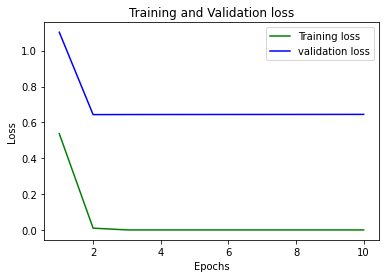

In [28]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

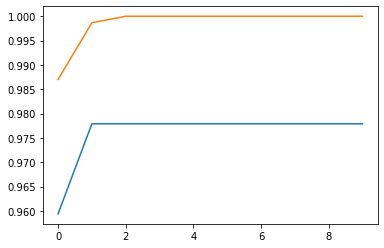

In [30]:
loss = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(loss)
plt.plot(accuracy)

In [3]:
mymodel1=tf.keras.models.load_model('saved_model/stage1')

In [7]:
import os
import cv2
import numpy as np

In [8]:
predictdata=[]
path=r"C:\Users\azhar\Desktop\project 3c\src\stage1\images"
os.listdir(path)
imagpath=""
for i in os.listdir(path):
    imgpath=os.path.join(path,i)
    imgarr=cv2.imread(imgpath,0)
    imgarr=cv2.resize(imgarr,(128,128))
    predictdata.append(imgarr)
    

In [9]:

x=np.array(predictdata)

lookup = {0:'1',1:'2',2:'3',3:'4',4:'5',5:'6',
          6:'7',7:'8',8:'9',9:'A',10:'B',11:'C',12:'D',13:'E',14:'F',15:'G',
          16:'H',17:'I',18:'J',19:'K',20:'L',21:'M',22:'N',23:'O',24:'P',
          25:'Q',26:'R',27:'S',28:'T',29:'U',30:'V',31:'W',32:'X',33:'Y',34:'Z'}

In [10]:
y=mymodel1.predict(x)
for i in y:
    ls=list(i)
    ls1=[ele*1000 for ele in ls]
    print(lookup[ls1.index(max(ls1))])

1
2
3
4
5
6
7
8
9
A
5
5
